# Comparison of predicted Throughput wrt data

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : October 10th 2022 
- last update : October 13th 2022

### 

- **kernel anaconda3_auxtel** at CC or **python 3** locally

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

from astropy import units as u

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
from functools import reduce
from scipy import interpolate

# Config

In [5]:
WLMINSEL=350
WLMAXSEL=1050

In [6]:
output_filename = "AuxTel-throughput_extended.txt"

# All component throughput

- information collected by Marc Moniez

In [7]:
filename = "AuxTel-throughput.xlsx"

In [8]:
df1 = pd.read_excel(filename,header=1,index_col=0)

In [9]:
df1.reset_index(inplace=True)

In [10]:
df1['index'] = df1.reset_index().index

In [11]:
df1.set_index('index')

,lambda,M1,M2,M3 (45°),windows per face,4 faces,total optics (except holo),holo,CCD,throughput,x10
index,,,,,,,,,,,
0,350,0.85,0.95,0.95,0.0125,0.05,0.728769,NaN,0.645,NaN,NaN
1,400,0.86,0.97,0.94,0.0125,0.05,0.744941,0.120,0.750,0.067045,0.670447
2,450,0.87,0.96,0.97,0.0125,0.05,0.769637,0.294,0.850,0.192332,1.923322
3,500,0.88,0.97,0.98,0.0125,0.05,0.794702,0.312,0.870,0.215714,2.157138
4,550,0.88,0.98,0.98,0.0125,0.05,0.802894,0.301,0.880,0.212671,2.126707
5,600,0.88,0.98,0.97,0.0125,0.05,0.794702,0.272,0.900,0.194543,1.945430
6,650,0.88,0.98,0.97,0.0125,0.05,0.794702,0.252,0.920,0.184244,1.842436
7,700,0.87,0.97,0.98,0.0125,0.05,0.785671,0.226,0.950,0.168684,1.686835
8,750,0.86,0.97,0.98,0.0125,0.05,0.776640,0.203,0.960,0.151352,1.513516


In [12]:
wl1 = df1["lambda"].values
t1_M1=df1["M1"].values
t1_M2=df1["M2"].values
t1_M3=df1["M3 (45°)"].values
t1_window=df1["4 faces"].values
t1_optic = df1["total optics (except holo)"].values
t1_holo=df1["holo"].values
t1_CCD=df1["CCD"].values
t1_throughput=df1["throughput"].values

## Information from Optical bench

In [13]:
filename = "20200211-holo-4-003-uniformity-datacube.npy"

In [14]:
thearray= np.load(filename)

In [15]:
df2 = pd.DataFrame(thearray)

In [16]:
sel_order0 = df2["order"] == 0
sel_order1 = df2["order"] == 1
sel_order2 = df2["order"] == 2

In [17]:
df_order0 = df2[sel_order0]
df_order1 = df2[sel_order1]
df_order2 = df2[sel_order2]

In [18]:
all_df_order1 = []
all_df_order2 = []
all_x0y0_order2 = []
all_x0y0_order1 = []

for xpos in df_order2.dx.unique():
    for ypos in df_order2.dy.unique():
        sel_cut = (df_order2["dx"] == xpos ) & (df_order2["dy"] == ypos)
        if len(sel_cut) >0:
            dfcut = df_order2[sel_cut]
            x0 =  dfcut.dx.unique()
            y0 =  dfcut.dy.unique()
            if len(x0) == 1 and len(y0) == 1:
                all_x0y0_order2.append((x0[0],y0[0]))
                all_df_order2.append(dfcut)
        
for xpos in df_order1.dx.unique():
    for ypos in df_order1.dy.unique():
        sel_cut = (df_order1["dx"] == xpos) & (df_order1["dy"] == ypos)
        if len(sel_cut) >0:
            dfcut = df_order1[sel_cut]
            x0 =  dfcut.dx.unique()
            y0 =  dfcut.dy.unique()
            if len(x0) == 1 and len(y0) == 1:
                all_x0y0_order1.append((x0[0],y0[0]))
                all_df_order1.append(dfcut)        

In [19]:
df2_optbench_center = all_df_order1[0]

In [20]:
df2_optbench_center.head()

,order,dx,dy,wl,DE,DE_std
1520,1,0.0,0.0,400.014,0.081134,0.000425
1521,1,0.0,0.0,419.989,0.122047,0.000553
1522,1,0.0,0.0,440.023,0.284278,0.000354
1523,1,0.0,0.0,459.966,0.307857,0.000382
1524,1,0.0,0.0,479.965,0.309489,0.000384


In [21]:
wl2 = df2_optbench_center["wl"].values
t2_holo = df2_optbench_center["DE"].values

# My extrapolation

In [22]:
wl_extrap = np.array([280.,300.,375.,400.,425.,1100])
thr_extrap = np.array([0.02777,0.07356,0.1609,0.2207,0.2759,0.0966])

# Plot Auxtel Throughput

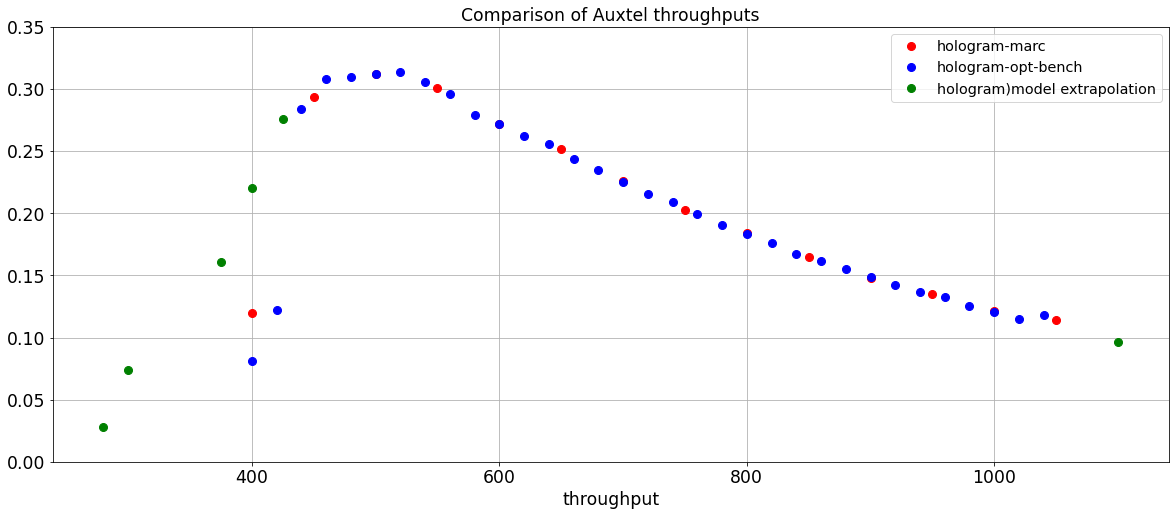

In [23]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,t1_holo,"ro",label="hologram-marc",lw=3,markersize=8)
ax.plot(wl2,t2_holo,"bo",label="hologram-opt-bench",lw=3,markersize=8)
ax.plot(wl_extrap,thr_extrap,"go",label="hologram)model extrapolation",lw=3,markersize=8)
ax.legend()
ax.set_ylim(0,0.35)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_xlabel("throughput")
ax.set_title("Comparison of Auxtel throughputs")
ax.grid()
plt.show()

# Combination of points

In [24]:
bad_points1=np.where(wl1<440)[0]

In [25]:
bad_points2=np.where(wl2<440)[0]

In [26]:
# selected points (cut collections)
wl1_k = np.delete(wl1,bad_points1)
t1_holo_k=np.delete(t1_holo,bad_points1)
wl2_k = np.delete(wl2,bad_points2)
t2_holo_k=np.delete(t2_holo,bad_points2)

In [27]:
all_wl = np.concatenate((wl_extrap ,wl1_k,wl2_k), axis=None)
all_tr = np.concatenate((thr_extrap,t1_holo_k,t2_holo_k),axis=None)

In [28]:
sorted_indexes = np.argsort(all_wl)
x = all_wl[sorted_indexes]
y = all_tr[sorted_indexes]

In [29]:
WL = np.arange(280,1100)
f_holo=interpolate.interp1d(x,y,kind='slinear')

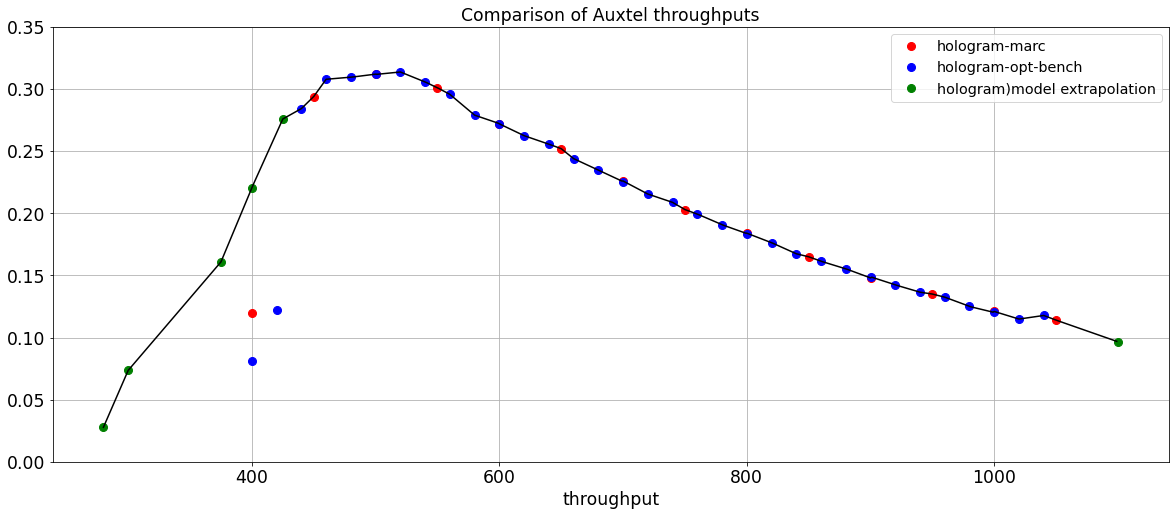

In [30]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,t1_holo,"ro",label="hologram-marc",lw=3,markersize=8)
ax.plot(wl2,t2_holo,"bo",label="hologram-opt-bench",lw=3,markersize=8)
ax.plot(wl_extrap,thr_extrap,"go",label="hologram)model extrapolation",lw=3,markersize=8)
ax.plot(WL,f_holo(WL),"k-")
ax.legend()
ax.set_ylim(0,0.35)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_xlabel("throughput")
ax.set_title("Comparison of Auxtel throughputs")
ax.grid()
plt.show()

# All throughputs

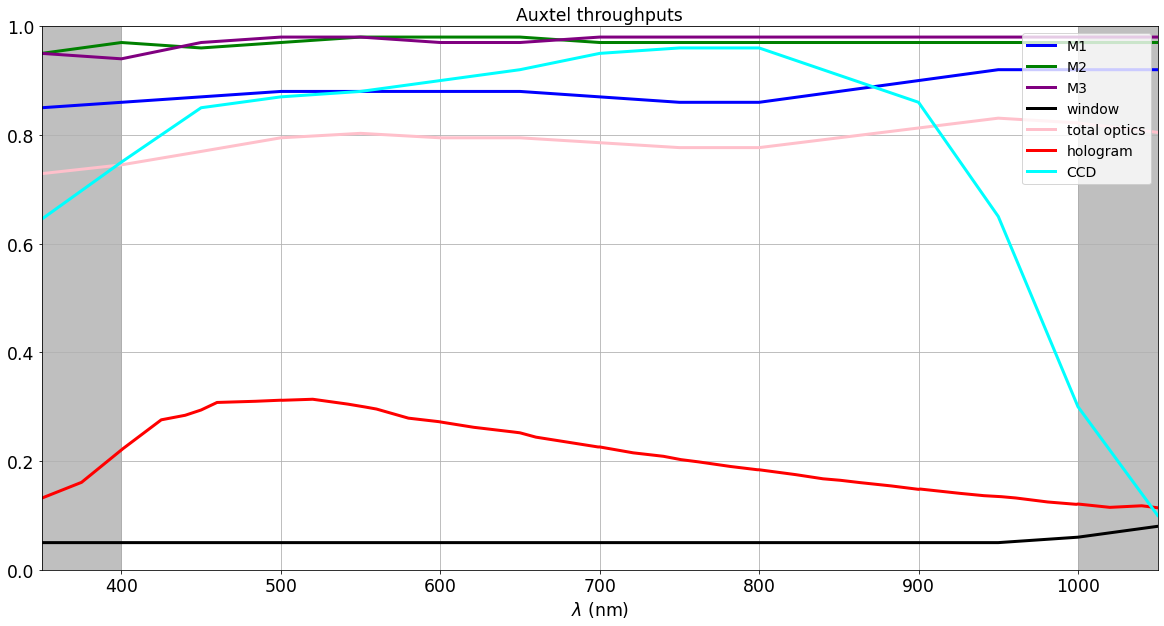

In [31]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,t1_M1,'b-',label="M1",lw=3)
ax.plot(wl1,t1_M2,'g-',label="M2",lw=3)
ax.plot(wl1,t1_M3,'-',color="purple",label="M3",lw=3)
ax.plot(wl1,t1_window,"k-",label="window",lw=3)
ax.plot(wl1,t1_optic,"-",color="pink",label="total optics",lw=3)
ax.plot(WL,f_holo(WL),"r-",label="hologram",lw=3)
ax.plot(wl1,t1_CCD,"-",color="cyan",label="CCD",lw=3)
#ax.plot(wl1,t_throughput,"-.",color="orange",label="total",lw=5)
ymin=0
ymax=1.0
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.legend(loc="upper right",fontsize=14)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

plt.savefig("auxtel_throughput_linscale.png")
plt.show()



# Data

In [32]:
path_data_nofilter =  "data_auxtel/MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv"
path_data_redfilter = "data_auxtel/MLfit_bouguer_linearfit-20220630-FELH0600~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv"
path_data_bluefilter = "data_auxtel/MLfit_bouguer_linearfit-20220630-BG40~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv"

In [33]:
df_data_nofilter = pd.read_csv(path_data_nofilter,index_col=0)
df_data_bluefilter = pd.read_csv(path_data_bluefilter,index_col=0)
df_data_redfilter = pd.read_csv(path_data_redfilter,index_col=0)

In [34]:
df_data_nofilter.head()

,wavelength,throu,errthrou,sedtoa,errsedtoa
0,350.000000,0.015525,0.009013,4.631562e-14,2.688646e-14
1,364.285714,0.018512,0.003320,1.175923e-13,2.109083e-14
2,378.571429,0.036680,0.002806,2.435918e-13,1.863336e-14
3,392.857143,0.068554,0.002937,5.290698e-13,2.266757e-14
4,407.142857,0.097367,0.002782,9.626200e-13,2.750371e-14


In [35]:
WL_data_nf = df_data_nofilter["wavelength"]
thr_data_nf = df_data_nofilter["throu"]
err_thr_data_nf = df_data_nofilter["errthrou"]

WL_data_bf = df_data_bluefilter["wavelength"]
thr_data_bf = df_data_bluefilter["throu"]
err_thr_data_bf = df_data_bluefilter["errthrou"]

WL_data_rf = df_data_redfilter["wavelength"]
thr_data_rf = df_data_redfilter["throu"]
err_thr_data_rf = df_data_redfilter["errthrou"]

In [36]:
# remove last point contaminated by order 2
WL_data_bf.drop(axis=0, index=len(WL_data_bf)-1,inplace=True)
thr_data_bf.drop(axis=0, index=len(thr_data_bf)-1,inplace=True)
err_thr_data_bf.drop(axis=0, index=len(err_thr_data_bf)-1,inplace=True)

## Filter throughput

In [37]:
path_redfilter = "../filters/FELH0600_Transmission.txt" 

In [38]:
red_filter = np.loadtxt(path_redfilter)
WL_rf = red_filter[:,0] 
thr_rf = red_filter[:,1] 

In [39]:
f_rf = interpolate.interp1d(WL_rf,thr_rf,kind='slinear')

In [40]:
path_bluefilter = "../filters/spectractor_tables/BG40.txt"

In [41]:
blue_filter = np.loadtxt(path_bluefilter)
WL_bf = blue_filter[:,0] 
thr_bf = blue_filter[:,1] 

In [42]:
f_bf = interpolate.interp1d(WL_bf,thr_bf,kind='slinear')

# Total Throughput

In [43]:
WL2=np.linspace(350,1050.,100)
WL3=np.linspace(550,1050.,100)
WL4=np.linspace(350.,700.,100)

In [44]:
f_optic = interpolate.interp1d(wl1,t1_optic,kind='slinear')
f_ccd = interpolate.interp1d(wl1,t1_CCD,kind='slinear')

In [45]:
thr_total = f_holo(WL2)*f_optic(WL2)*f_ccd(WL2)
thr_total_rf = f_holo(WL3)*f_optic(WL3)*f_ccd(WL3)*f_rf(WL3)
thr_total_bf = f_holo(WL4)*f_optic(WL4)*f_ccd(WL4)*f_bf(WL4)

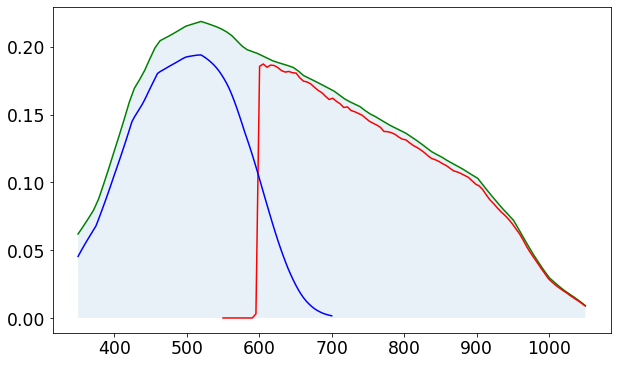

In [46]:
plt.plot(WL2,thr_total,'g-')
plt.plot(WL3,thr_total_rf,'r-')
plt.plot(WL4,thr_total_bf,'b-')
plt.fill_between(WL2,y1=0,y2=thr_total,alpha=0.1)

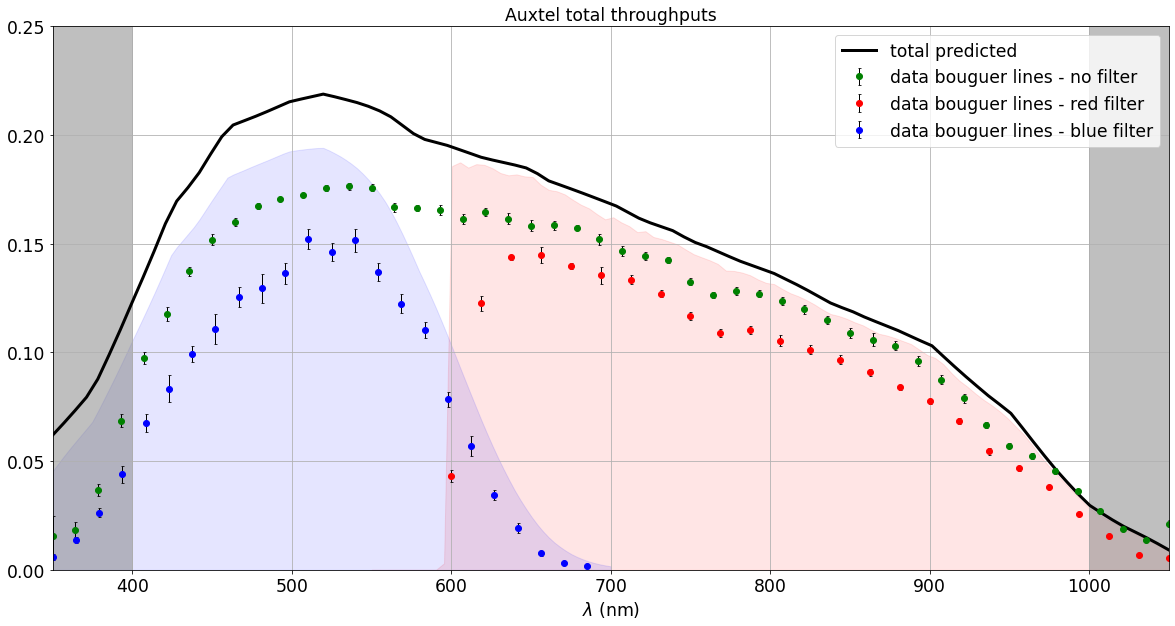

In [47]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ax.plot(WL2,thr_total,'k-',label="total predicted",lw=3)
ax.fill_between(WL3,y1=0,y2=thr_total_rf,color='r',alpha=0.1)
ax.fill_between(WL4,y1=0,y2=thr_total_bf,color='b',alpha=0.1)

ax.errorbar(WL_data_nf,thr_data_nf,yerr=err_thr_data_nf,fmt = 'o', color="g",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - no filter")
ax.errorbar(WL_data_rf,thr_data_rf,yerr=err_thr_data_rf,fmt = 'o', color="r",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - red filter")
ax.errorbar(WL_data_bf,thr_data_bf,yerr=err_thr_data_bf,fmt = 'o', color="b",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - blue filter") 

ymin=0
ymax=0.25
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.legend(loc="upper right",fontsize="xx-large")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel total throughputs")
plt.savefig("auxtel_throughput_linscale_data.png")
plt.show()

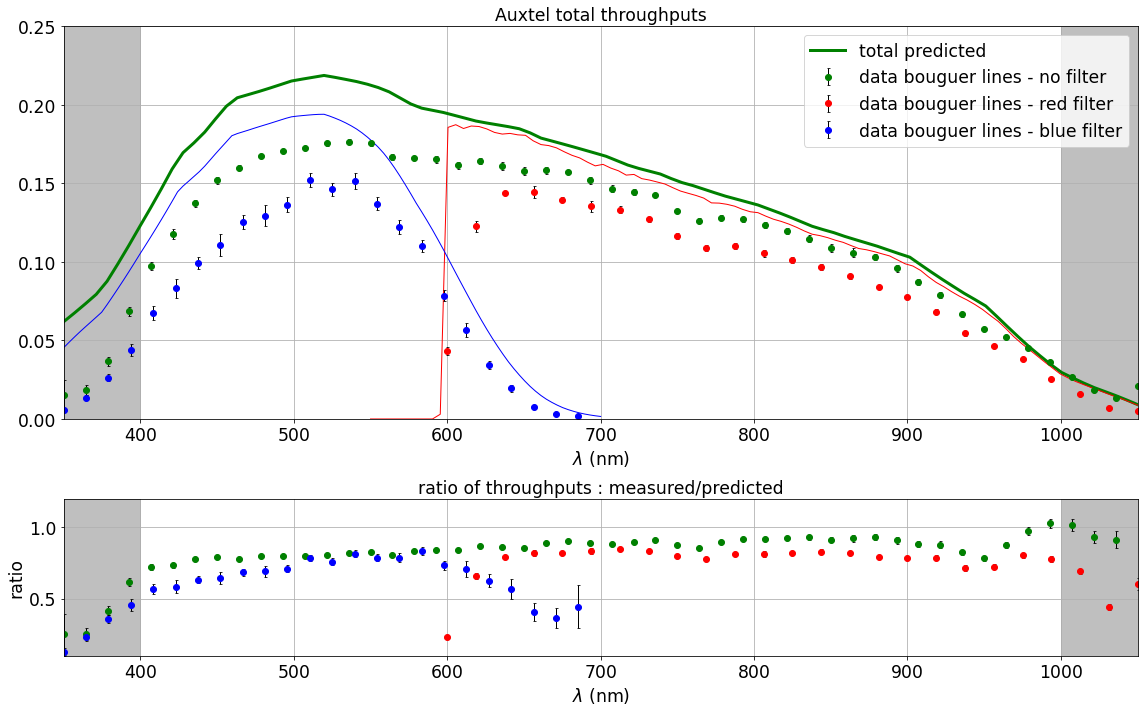

In [48]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(2, 1,height_ratios=[2.5,1] ,figure=fig)


ax=fig.add_subplot(gs[0,0])
ax.plot(WL2,thr_total,'g-',label="total predicted",lw=3)

ax.plot(WL3,thr_total_rf,'r-',lw=1)
ax.plot(WL4,thr_total_bf,'b-',lw=1)

ax.errorbar(WL_data_nf,thr_data_nf,yerr=err_thr_data_nf,fmt = 'o', color="g",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - no filter") 
ax.errorbar(WL_data_rf,thr_data_rf,yerr=err_thr_data_rf,fmt = 'o', color="r",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - red filter") 
ax.errorbar(WL_data_bf,thr_data_bf,yerr=err_thr_data_bf,fmt = 'o', color="b",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - blue filter") 
ymin=0
ymax=0.25
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.legend(loc="upper right",fontsize="xx-large")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel total throughputs")


ax=fig.add_subplot(gs[1,0])

thr_total_denom_nf = f_holo(WL_data_nf)*f_optic(WL_data_nf)*f_ccd(WL_data_nf)
ratio_data_nf = thr_data_nf/thr_total_denom_nf
eratio_data_nf = err_thr_data_nf/thr_total_denom_nf

thr_total_denom_rf = f_holo(WL_data_rf)*f_optic(WL_data_rf)*f_ccd(WL_data_rf)*f_rf(WL_data_rf) 
ratio_data_rf = thr_data_rf/thr_total_denom_rf
eratio_data_rf = err_thr_data_rf/thr_total_denom_rf

thr_total_denom_bf = f_holo(WL_data_bf)*f_optic(WL_data_bf)*f_ccd(WL_data_bf)*f_bf(WL_data_bf) 
ratio_data_bf = thr_data_bf/thr_total_denom_bf
eratio_data_bf = err_thr_data_bf/thr_total_denom_bf



ax.errorbar(WL_data_nf,ratio_data_nf,yerr=eratio_data_nf,fmt = 'o', color="g",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8) 
ax.errorbar(WL_data_rf,ratio_data_rf,yerr=eratio_data_rf,fmt = 'o', color="r",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8)
ax.errorbar(WL_data_bf,ratio_data_bf,yerr=eratio_data_bf,fmt = 'o', color="b",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8) 
ax.grid()

ymin=0.1
ymax=1.2
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
ax.set_title("ratio of throughputs : measured/predicted")

#rect=mpl.patches.Rectangle((405,ymin),585-405,ymax,color ='yellow',alpha=0.5)
#ax.add_patch(rect)

plt.tight_layout()

# Fit a straight line

In [49]:
idx_nf = np.where(np.logical_and(WL_data_nf.values>420,WL_data_nf.values<900))[0]
idx_rf = np.where(np.logical_and(WL_data_rf.values>630,WL_data_rf.values<900))[0]
idx_bf = np.where(np.logical_and(WL_data_bf.values>405,WL_data_bf.values<585))[0]

In [50]:
wl_nf =WL_data_nf.values[idx_nf]
wl_rf =WL_data_rf.values[idx_rf]
wl_bf =WL_data_bf.values[idx_bf]
r_nf = ratio_data_nf.values[idx_nf]
r_rf = ratio_data_rf.values[idx_rf]
r_bf = ratio_data_bf.values[idx_bf]

In [51]:
idx2_nf = np.where(np.logical_and(wl_nf>758,wl_nf<768))[0]
idx2_rf = np.where(np.logical_and(wl_rf>758,wl_rf<768))[0]
wl_nf = np.delete(wl_nf,idx2_nf)
wl_rf = np.delete(wl_rf,idx2_rf)
r_nf = np.delete(r_nf,idx2_nf)
r_rf = np.delete(r_rf,idx2_rf)

In [52]:
z_nf=np.polyfit(wl_nf, r_nf, 1)
z_rf=np.polyfit(wl_rf, r_rf, 1)
z_bf=np.polyfit(wl_bf, r_bf, 1)
p_nf = np.poly1d(z_nf)
p_rf = np.poly1d(z_rf)
p_bf = np.poly1d(z_bf)

In [53]:
a = z_nf[0]
b= z_nf[1]
label_nf = f"no filter:ratio = {a:.3g} $\lambda$ + {b:.3g}"

In [54]:
a = z_rf[0]
b= z_rf[1]
label_rf = f"red filter:ratio = {a:.3g} $\lambda$ + {b:.3g}"

In [55]:
a = z_bf[0]
b= z_bf[1]
label_bf = f"blue filter:ratio = {a:.3g} $\lambda$ + {b:.3g}"

Text(0, 0.5, 'ratio')

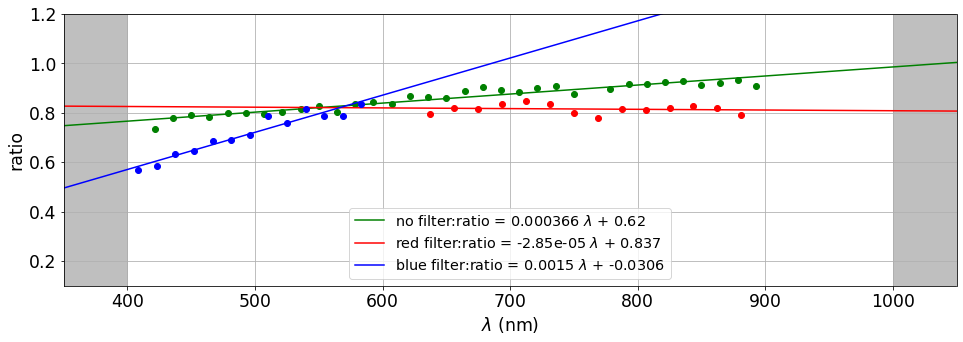

In [56]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(111)
ax.plot(wl_nf,r_nf,'go')
ax.plot(WL2,p_nf(WL2),'g-',label=label_nf)
ax.plot(wl_rf,r_rf,'ro')
ax.plot(WL2,p_rf(WL2),'r-',label=label_rf)
ax.plot(wl_bf,r_bf,'bo')
ax.plot(WL2,p_bf(WL2),'b-',label=label_bf)
ymin=0.1
ymax=1.2
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.grid()
ax.legend(loc="lower center")
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")

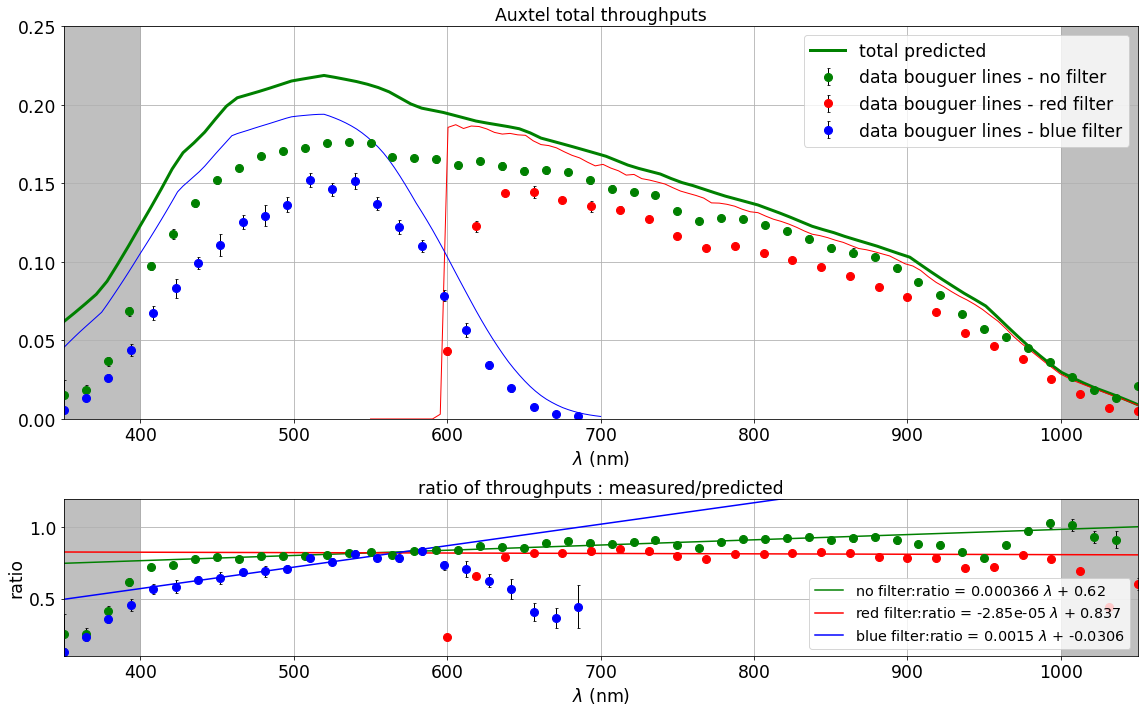

In [57]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(2, 1,height_ratios=[2.5,1] ,figure=fig)


ax=fig.add_subplot(gs[0,0])
ax.plot(WL2,thr_total,'g-',label="total predicted",lw=3)
ax.plot(WL3,thr_total_rf,'r-',lw=1)
ax.plot(WL4,thr_total_bf,'b-',lw=1)


ax.errorbar(WL_data_nf,thr_data_nf,yerr=err_thr_data_nf,fmt = 'o', color="g",ms=8,capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - no filter") 
ax.errorbar(WL_data_rf,thr_data_rf,yerr=err_thr_data_rf,fmt = 'o', color="r",ms=8,capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - red filter") 
ax.errorbar(WL_data_bf,thr_data_bf,yerr=err_thr_data_bf,fmt = 'o', color="b",ms=8,capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - blue filter") 
ymin=0
ymax=0.25
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.legend(loc="upper right",fontsize="xx-large")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel total throughputs")


ax=fig.add_subplot(gs[1,0])

thr_total_denom_nf = f_holo(WL_data_nf)*f_optic(WL_data_nf)*f_ccd(WL_data_nf)
ratio_data_nf = thr_data_nf/thr_total_denom_nf
eratio_data_nf = err_thr_data_nf/thr_total_denom_nf

thr_total_denom_rf = f_holo(WL_data_rf)*f_optic(WL_data_rf)*f_ccd(WL_data_rf)*f_rf(WL_data_rf) 
ratio_data_rf = thr_data_rf/thr_total_denom_rf
eratio_data_rf = err_thr_data_rf/thr_total_denom_rf

thr_total_denom_bf = f_holo(WL_data_bf)*f_optic(WL_data_bf)*f_ccd(WL_data_bf)*f_bf(WL_data_bf) 
ratio_data_bf = thr_data_bf/thr_total_denom_bf
eratio_data_bf = err_thr_data_bf/thr_total_denom_bf


ax.errorbar(WL_data_nf,ratio_data_nf,yerr=eratio_data_nf,fmt = 'o', color="g",ms=8,capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8) 
ax.errorbar(WL_data_rf,ratio_data_rf,yerr=eratio_data_rf,fmt = 'o', color="r",ms=8,capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8)
ax.errorbar(WL_data_bf,ratio_data_bf,yerr=eratio_data_bf,fmt = 'o', color="b",ms=8,capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8) 
ax.grid()
ax.plot(WL2,p_nf(WL2),'g-',label=label_nf)
ax.plot(WL2,p_rf(WL2),'r-',label=label_rf)
ax.plot(WL2,p_bf(WL2),'b-',label=label_bf)
ax.legend(loc="lower right")

ymin=0.1
ymax=1.2
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
ax.set_title("ratio of throughputs : measured/predicted")

plt.tight_layout()

# Ratio of throuputs

In [58]:
f_thr_nf=interpolate.interp1d(WL_data_nf,thr_data_nf,kind='slinear')
f_thr_rf=interpolate.interp1d(WL_data_rf,thr_data_rf,kind='slinear')
f_thr_bf=interpolate.interp1d(WL_data_bf,thr_data_bf,kind='slinear')

In [59]:
WLr = np.arange(WL_data_rf.min(),WL_data_rf.max())
WLb = np.arange(WL_data_bf.min(),WL_data_bf.max())

Text(0.5, 1.01, 'Comparison of measured filter throuput with data-sheet filter throuput')

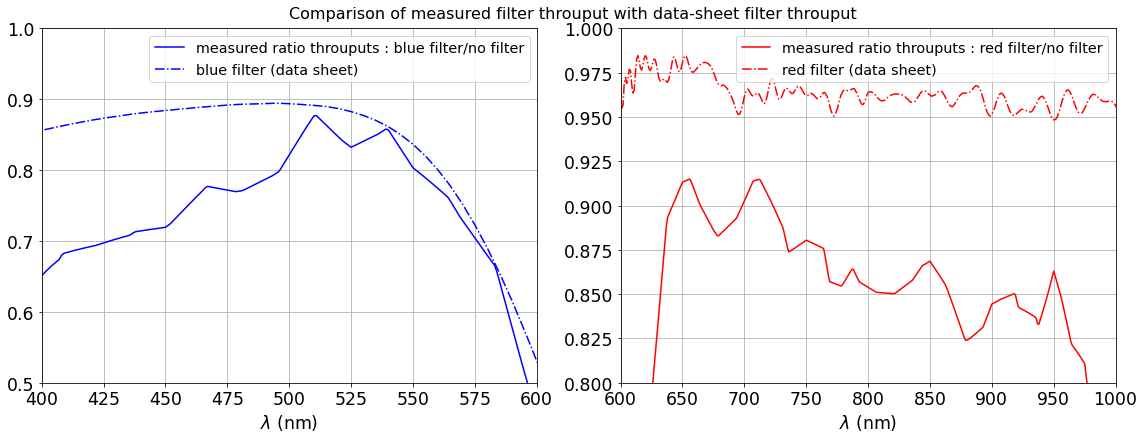

In [60]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(121)
ax.plot(WLb,f_thr_bf(WLb)/f_thr_nf(WLb),'b-',label="measured ratio throuputs : blue filter/no filter")
ax.plot(WLb,f_bf(WLb),'b-.',label="blue filter (data sheet)" )
ax.legend()
ax.set_xlim(400,600)
ax.grid()
ax.set_ylim(0.5,1)
ax.set_xlabel("$\lambda$ (nm)")
ax=fig.add_subplot(122)
ax.plot(WLr,f_thr_rf(WLr)/f_thr_nf(WLr),'r-',label="measured ratio throuputs : red filter/no filter")
ax.plot(WLr,f_rf(WLr),'r-.',label="red filter (data sheet)" )
ax.legend()
ax.grid()
ax.set_ylim(0.8,1)
ax.set_xlim(600,1000)
ax.set_xlabel("$\lambda$ (nm)")
plt.tight_layout()
plt.suptitle("Comparison of measured filter throuput with data-sheet filter throuput",y=1.01,fontsize=16)

Text(0.5, 1.01, 'Comparison of measured filter throuput with data-sheet filter throuput')

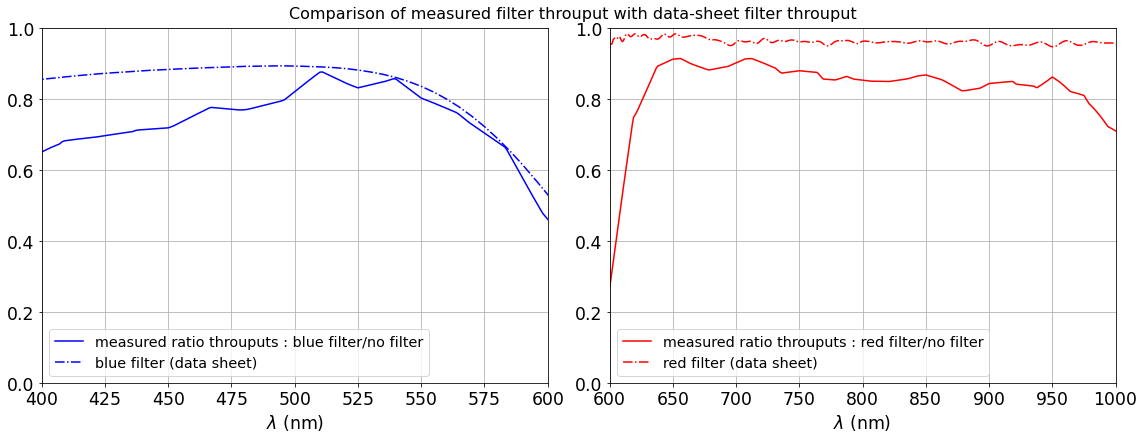

In [61]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(121)
ax.plot(WLb,f_thr_bf(WLb)/f_thr_nf(WLb),'b-',label="measured ratio throuputs : blue filter/no filter")
ax.plot(WLb,f_bf(WLb),'b-.',label="blue filter (data sheet)" )
ax.legend()
ax.set_xlim(400,600)
ax.grid()
ax.set_ylim(0,1)
ax.set_xlabel("$\lambda$ (nm)")
ax=fig.add_subplot(122)
ax.plot(WLr,f_thr_rf(WLr)/f_thr_nf(WLr),'r-',label="measured ratio throuputs : red filter/no filter")
ax.plot(WLr,f_rf(WLr),'r-.',label="red filter (data sheet)" )
ax.legend()
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(600,1000)
ax.set_xlabel("$\lambda$ (nm)")
plt.tight_layout()
plt.suptitle("Comparison of measured filter throuput with data-sheet filter throuput",y=1.01,fontsize=16)

In [62]:
! ls -l data_auxtel

total 64
-rw-r--r--  1 dagoret  staff  2613 Oct 17 23:14 MLfit_bouguer_linearfit-20220630-BG40~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
-rw-r--r--  1 dagoret  staff  2613 Oct 17 23:14 MLfit_bouguer_linearfit-20220630-BG40~holo4_003-config_DECONVOLUTION_PSF2D_out.csv
-rw-r--r--  1 dagoret  staff  2436 Oct 17 23:14 MLfit_bouguer_linearfit-20220630-FELH0600~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
-rw-r--r--  1 dagoret  staff  2040 Oct 17 23:14 MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_new_out.csv
-rw-r--r--  1 dagoret  staff  5321 Oct 17 23:14 MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
-rw-r--r--  1 dagoret  staff  5280 Oct 17 23:14 MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2_out.csv
